In [214]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import datetime

In [347]:
df = yf.download('BTC-USD', start='2015-01-01', 
                 interval='1wk'
                )

[*********************100%***********************]  1 of 1 completed


In [348]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,257.612000,294.337006,294.337006,196656000
2015-01-08,294.135010,294.135010,171.509995,178.102997,178.102997,261529108
2015-01-15,176.897003,229.067001,176.897003,226.897003,226.897003,246383304
2015-01-22,227.322006,309.384003,225.195999,233.914993,233.914993,312076700
2015-01-29,233.348007,245.957001,212.014999,226.852997,226.852997,209285400
...,...,...,...,...,...,...
2023-04-06,28175.226562,30509.083984,27738.759766,30139.052734,30139.052734,104303658247
2023-04-13,29892.740234,31005.607422,28669.898438,28822.679688,28822.679688,126867499554
2023-04-20,28823.683594,29995.837891,27070.849609,28422.701172,28422.701172,135301949612


In [349]:
six_months_ago = pd.Timestamp.now() - pd.DateOffset(months=6)
sd = np.std(df['High'] - df['Low'])

max = df['Close'].loc[six_months_ago:].max() + (sd * 3)
min = df['Close'].loc[six_months_ago:].min() - (sd * 3)

sd, max, min

(2961.7207927227237, 39024.21511254317, 6995.61789526933)

In [362]:
subset = df[(df['Close'] >= min) & (df['Close'] <= max)]

subset.iloc[150]

Open         1.928994e+04
High         2.267382e+04
Low          1.907671e+04
Close        2.024109e+04
Adj Close    2.024109e+04
Volume       2.912473e+11
Name: 2022-09-08 00:00:00, dtype: float64

In [351]:
df = subset

In [352]:
supports = df[df.Low == df.Low.rolling(5, center=True).min()].Low
resistances = df[df.High == df.High.rolling(5, center=True).max()].High

In [353]:
levels = pd.concat([supports, resistances])

In [354]:
levels.diff()

Date
2017-12-21             NaN
2018-01-11    -2430.709961
2018-02-01    -3354.030273
2018-04-12      758.250000
2018-07-12     -670.089844
2019-05-09     -154.103516
2019-07-11     3180.818359
2019-08-29      258.495117
2019-09-26    -1590.871094
2019-10-24     -383.770020
2019-11-21     -829.821777
2019-12-12      -77.117676
2020-01-02      374.946777
2020-04-16     -359.491699
2020-06-25     2420.020996
2020-09-03      940.967773
2021-01-21    19036.879883
2021-06-17      -59.751953
2021-07-15      467.333984
2022-05-12    -3010.464844
2022-06-16    -8641.867188
2022-09-15      581.691406
2022-10-13       29.507812
2022-11-17    -2720.775391
2022-12-15      799.089844
2023-02-09     5061.951172
2023-03-09    -1831.833984
2023-04-20     7442.595703
2017-12-14    -6981.849609
2018-01-04    -2376.599609
2018-02-15    -5753.900391
2018-05-03    -1994.000000
2018-07-19    -1540.230469
2019-06-20     5372.219727
2019-08-01    -1522.667969
2019-09-05    -1375.059570
2019-10-24     -877.017

In [342]:
sd = np.std(df['High'] - df['Low'])

sd

2621.0456170092343

In [355]:
levels = levels[abs(levels.diff()) > sd * 2]

In [356]:
levels.diff()

Date
2021-01-21             NaN
2022-06-16   -11244.750000
2023-04-20     9362.226562
2017-12-14    -6981.849609
2021-01-07    21857.738281
2021-05-13     9491.378906
2021-06-10   -10142.847656
2022-05-26    -9045.406250
2022-08-11    -7114.273438
2023-02-16       -1.472656
dtype: float64

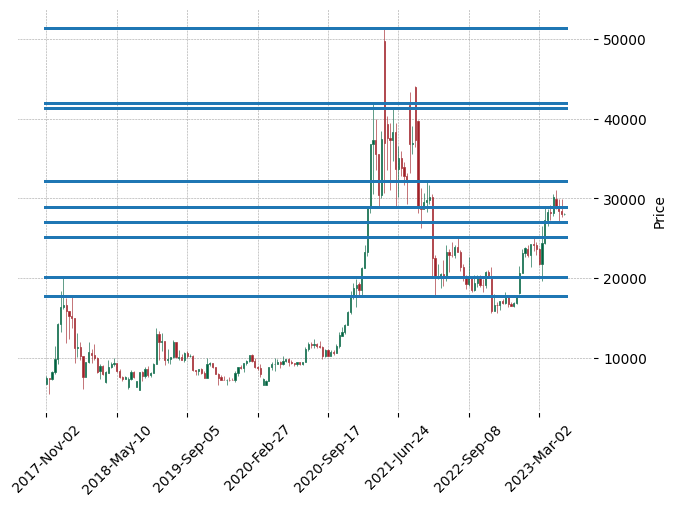

In [357]:
mpf.plot(df, type='candle', hlines=levels.to_list(),style='charles')